In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
data.drop(['_c39'],axis=1,inplace=True)

In [7]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


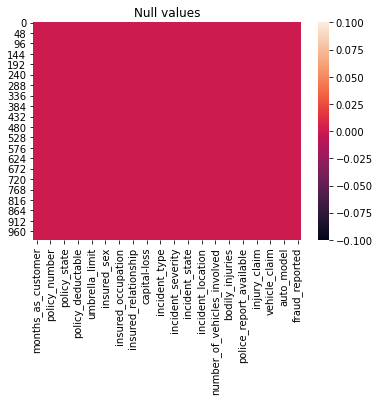

In [9]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [13]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [25]:
data['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

# DATA ENCODING

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()
label=le.fit_transform(data["policy_bind_date"])
label
data=data.drop("policy_bind_date",axis='columns')
data["policy_bind_date"]=label


In [29]:
le=LabelEncoder()
label=le.fit_transform(data["policy_state"])
label
data=data.drop("policy_state",axis='columns')
data["policy_state"]=label


In [30]:
le=LabelEncoder()
label=le.fit_transform(data["policy_csl"])
label
data=data.drop("policy_csl",axis='columns')
data["policy_csl"]=label


In [32]:
le=LabelEncoder()
label=le.fit_transform(data["insured_sex"])
label
data=data.drop("insured_sex",axis='columns')
data["insured_sex"]=label


In [33]:
le=LabelEncoder()
label=le.fit_transform(data["insured_education_level"])
label
data=data.drop("insured_education_level",axis='columns')
data["insured_education_level"]=label


In [35]:
le=LabelEncoder()
label=le.fit_transform(data["insured_occupation"])
label
data=data.drop("insured_occupation",axis='columns')
data["insured_occupation"]=label


In [36]:
le=LabelEncoder()
label=le.fit_transform(data["insured_hobbies"])
label
data=data.drop("insured_hobbies",axis='columns')
data["insured_hobbies"]=label


In [38]:
le=LabelEncoder()
label=le.fit_transform(data["insured_relationship"])
label
data=data.drop("insured_relationship",axis='columns')
data["insured_relationship"]=label


In [40]:
le=LabelEncoder()
label=le.fit_transform(data["incident_date"])
label
data=data.drop("incident_date",axis='columns')
data["incident_date"]=label


In [41]:
le=LabelEncoder()
label=le.fit_transform(data["incident_type"])
label
data=data.drop("incident_type",axis='columns')
data["incident_type"]=label


In [43]:
le=LabelEncoder()
label=le.fit_transform(data["collision_type"])
label
data=data.drop("collision_type",axis='columns')
data["collision_type"]=label


In [44]:
le=LabelEncoder()
label=le.fit_transform(data["incident_severity"])
label
data=data.drop("incident_severity",axis='columns')
data["incident_severity"]=label


In [46]:
le=LabelEncoder()
label=le.fit_transform(data["authorities_contacted"])
label
data=data.drop("authorities_contacted",axis='columns')
data["authorities_contacted"]=label


In [47]:
le=LabelEncoder()
label=le.fit_transform(data["incident_state"])
label
data=data.drop("incident_state",axis='columns')
data["incident_state"]=label


In [48]:
le=LabelEncoder()
label=le.fit_transform(data["incident_city"])
label
data=data.drop("incident_city",axis='columns')
data["incident_city"]=label


In [50]:
le=LabelEncoder()
label=le.fit_transform(data["incident_location"])
label
data=data.drop("incident_location",axis='columns')
data["incident_location"]=label


In [52]:
le=LabelEncoder()
label=le.fit_transform(data["property_damage"])
label
data=data.drop("property_damage",axis='columns')
data["property_damage"]=label


In [54]:
le=LabelEncoder()
label=le.fit_transform(data["police_report_available"])
label
data=data.drop("police_report_available",axis='columns')
data["police_report_available"]=label


In [56]:
le=LabelEncoder()
label=le.fit_transform(data["auto_make"])
label
data=data.drop("auto_make",axis='columns')
data["auto_make"]=label


In [57]:
le=LabelEncoder()
label=le.fit_transform(data["auto_model"])
label
data=data.drop("auto_model",axis='columns')
data["auto_model"]=label


In [60]:
le=LabelEncoder()
label=le.fit_transform(data["fraud_reported"])
label
data=data.drop("fraud_reported",axis='columns')
data["fraud_reported"]=label
data


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,4,4,1,996,2,2,10,1,1
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,1,4,5,5,628,0,0,8,12,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,1,4,1,1,685,1,1,4,30,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,4,2,0,669,0,1,3,34,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,1,2,1,0,220,1,1,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,...,1,1,0,4,561,2,0,6,6,0
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,0,1,4,3,227,2,0,13,28,0
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,1,4,0,0,746,0,2,11,19,0
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,0,3,1,0,569,0,2,1,5,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_hour_of_the_day     1000 non-null   int64  
 10  number_of_vehicles_involved  1000 non-null   int64  
 11  bodily_injuries              1000 non-null   int64  
 12  witnesses                    1000 non-null   int64  
 13  total_claim_amount 

In [62]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,1.184000,2.167000,3.242000,2.966000,499.500000,0.94200,0.971000,6.546000,19.318000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,0.939695,1.532142,2.155942,2.044266,288.819436,0.81197,0.810442,4.034869,11.136107,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,249.750000,0.00000,0.000000,3.000000,10.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,1.000000,2.000000,4.000000,3.000000,499.500000,1.00000,1.000000,7.000000,20.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,2.000000,4.000000,5.000000,5.000000,749.250000,2.00000,2.000000,10.000000,29.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,3.000000,4.000000,6.000000,6.000000,999.000000,2.00000,2.000000,13.000000,38.000000,1.000000


In [63]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,...,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.007040,0.017647,0.047655,0.004202,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,...,-0.058439,0.015417,0.005770,-0.002291,-0.011101,-0.001486,0.014661,0.030410,0.017343,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,...,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.005575,0.032019,0.023860,0.065240,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,...,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.016900,0.030166,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,...,-0.011155,-0.055191,0.046434,0.048724,0.017883,0.095359,0.013624,0.000045,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,...,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.056957,-0.055951,-0.004443,0.040256,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,...,-0.023855,-0.017548,-0.047669,-0.017532,-0.013847,0.060342,-0.017607,-0.020892,0.023637,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,...,-0.013396,-0.044892,0.013833,-0.024989,0.035194,0.023921,-0.012237,0.052014,0.036569,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,...,-0.018647,0.025192,-0.048651,-0.038092,-0.032264,0.005249,-0.027218,-0.041658,-0.037288,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,...,-0.071946,-0.060955,-0.036525,0.017039,0.006793,0.070469,0.040809,-0.002556,-0.058342,0.004316


<AxesSubplot:>

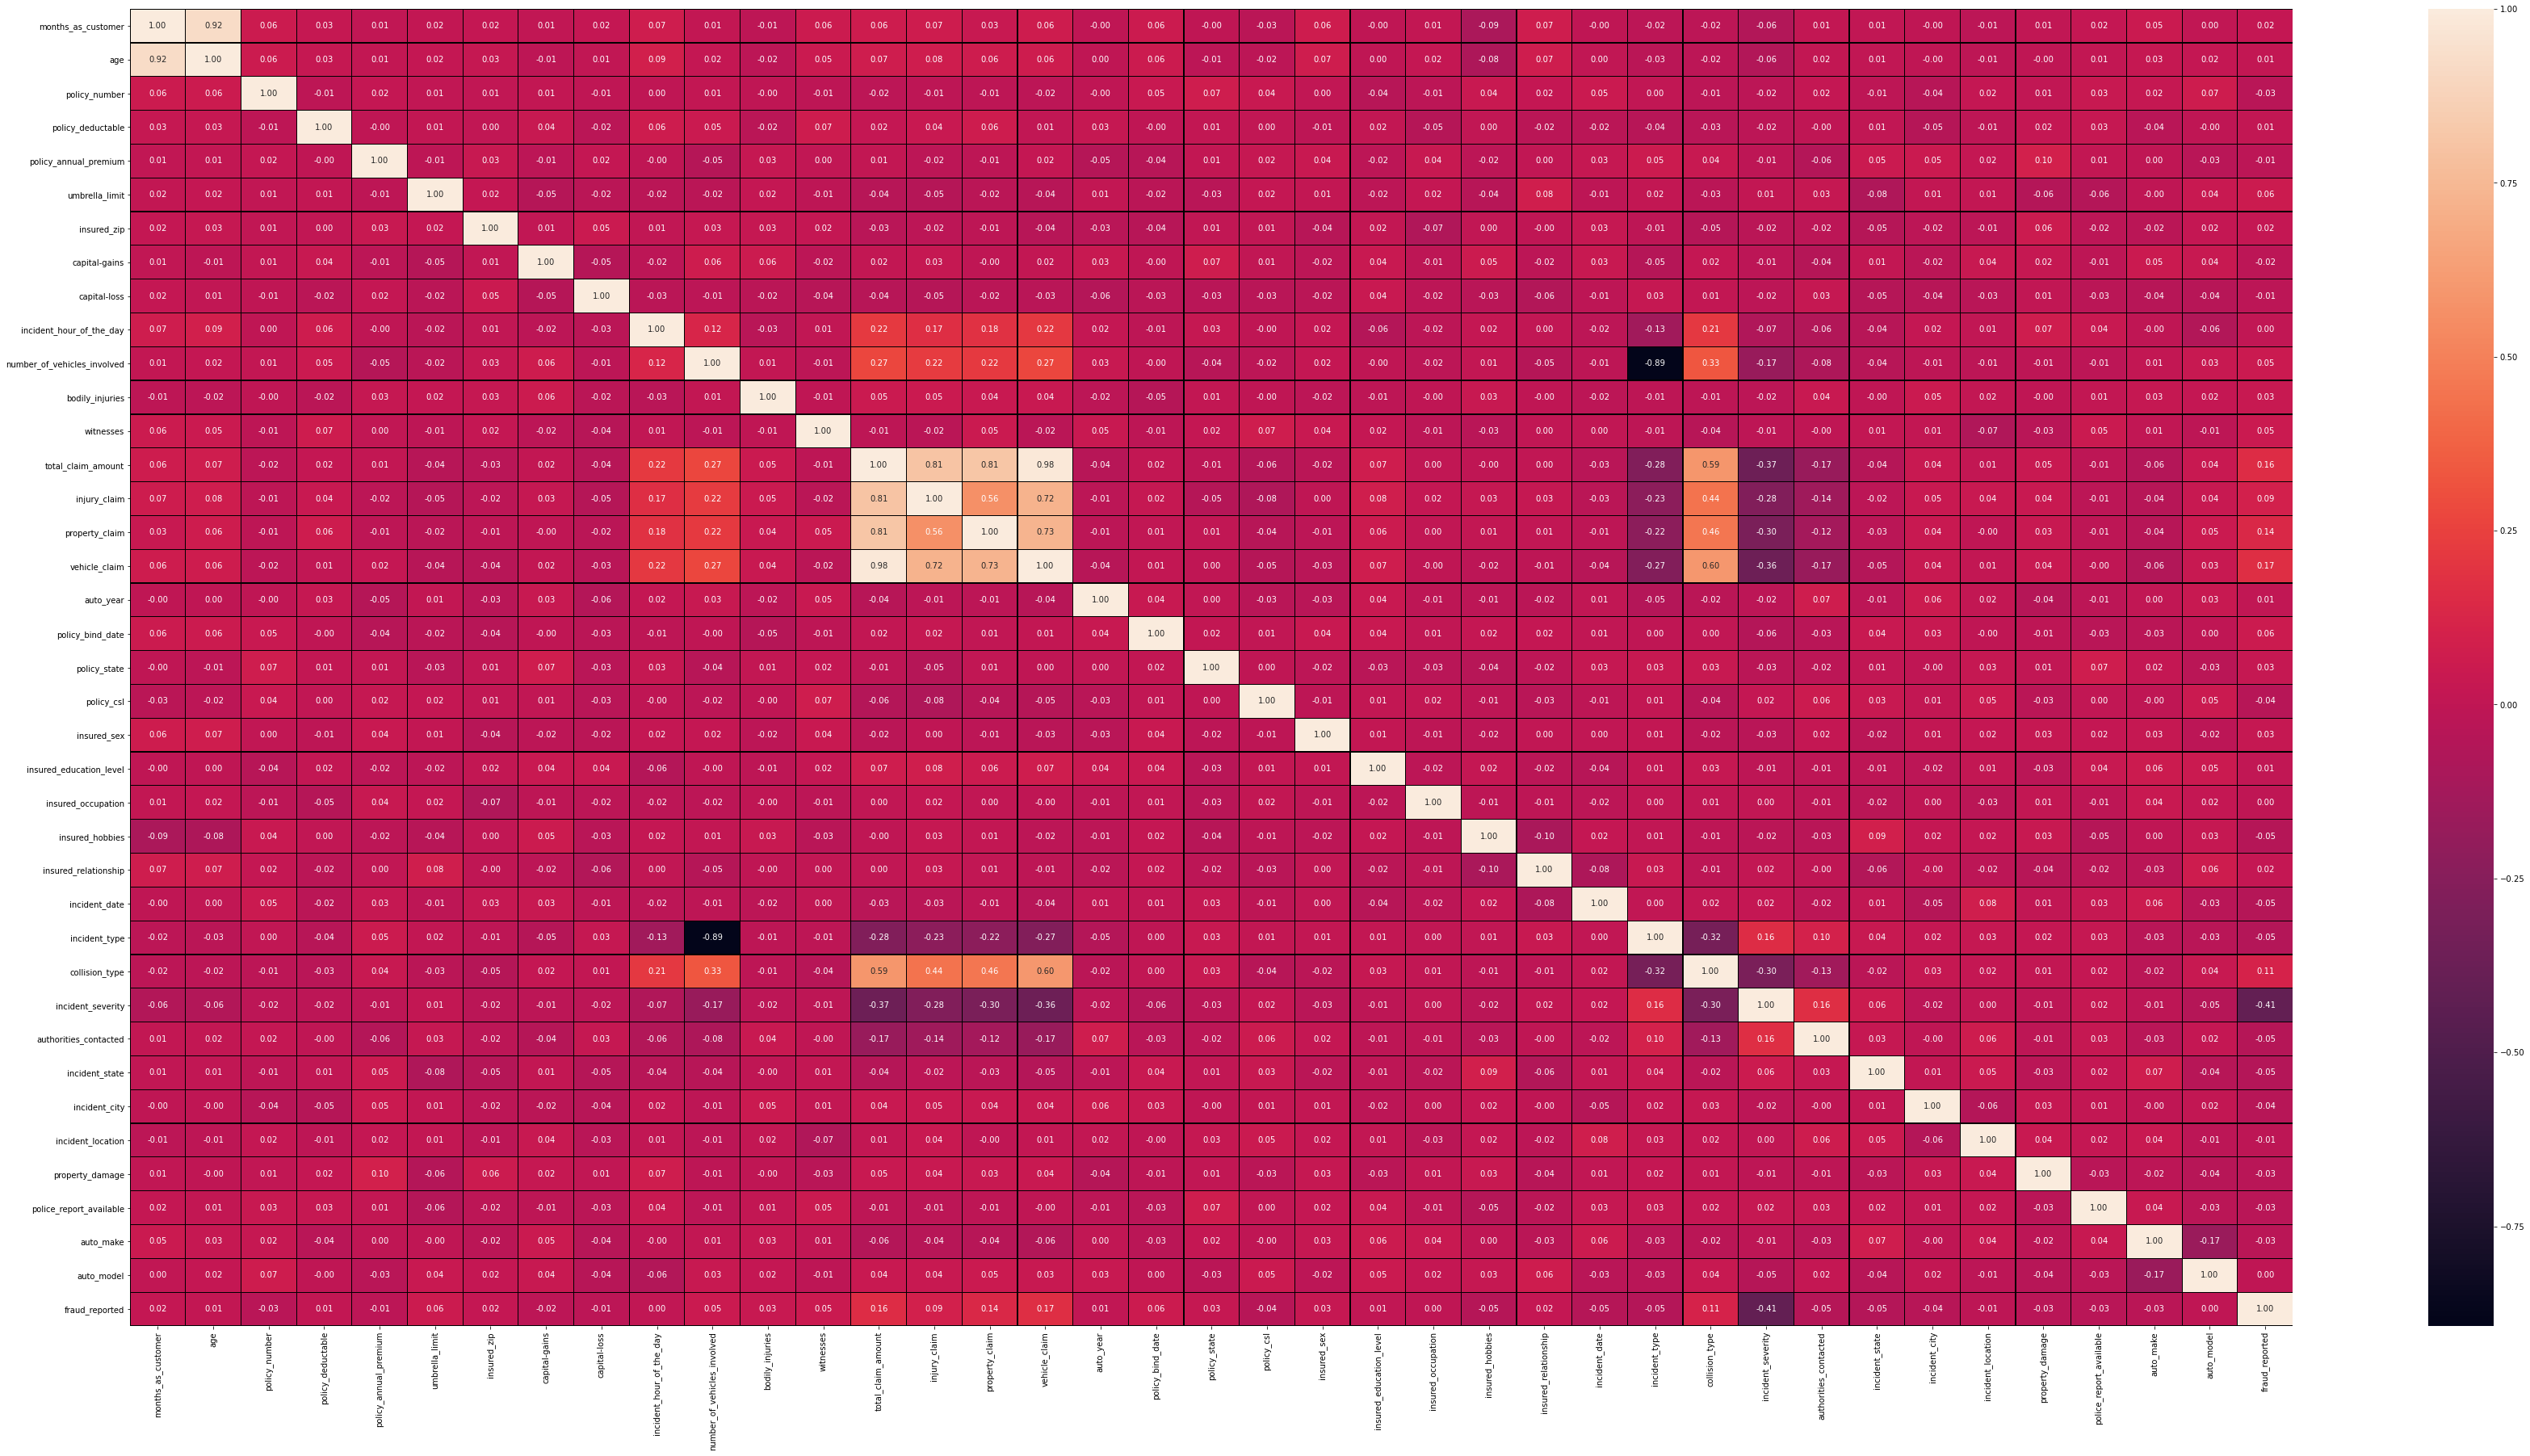

In [64]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_number                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_annual_premium             AxesSubplot(0.125,0.739237;0.168478x0.0639831)
umbrella_limit                 AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
insured_zip                    AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
capital-gains                  AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
capital-loss                      AxesSubplot(0.125,0.662458;0.168478x0.0639831)
incident_hour_of_the_day       AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
number_of_vehicles_involved    AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
bodily_injuries                AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
witnesses                   

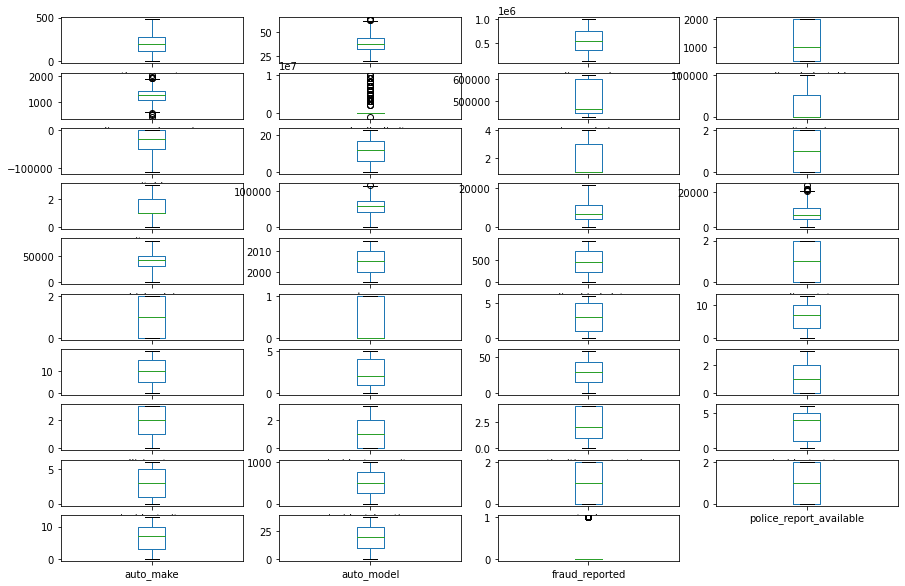

In [65]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(10,4),figsize = (15,10))

In [66]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563


In [67]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[1.07813958 0.99083647 0.09595307 ... 0.85646614 1.64574255 1.74601919]
 [0.2089946  0.33407345 0.79152739 ... 0.36053902 0.65747047 1.74601919]
 [0.60800168 1.08891308 0.55056594 ... 0.63131523 0.95970204 0.57273139]
 ...
 [0.64276748 0.54161057 1.44891961 ... 1.1044297  0.02857005 0.57273139]
 [2.20802805 2.52328351 0.04786687 ... 1.37520591 1.28637088 0.57273139]
 [2.19064515 2.3043625  0.03830297 ... 0.36053902 0.65747047 0.57273139]]


In [68]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([ 0,  1,  2, ..., 36, 37, 38], dtype=int64))
(1000, 39)


In [69]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [70]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(1000, 39)
(980, 39)
Shape after removing outlires (980, 39)


In [71]:
data.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488


months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_number                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_annual_premium             AxesSubplot(0.125,0.739237;0.168478x0.0639831)
umbrella_limit                 AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
insured_zip                    AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
capital-gains                  AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
capital-loss                      AxesSubplot(0.125,0.662458;0.168478x0.0639831)
incident_hour_of_the_day       AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
number_of_vehicles_involved    AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
bodily_injuries                AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
witnesses                   

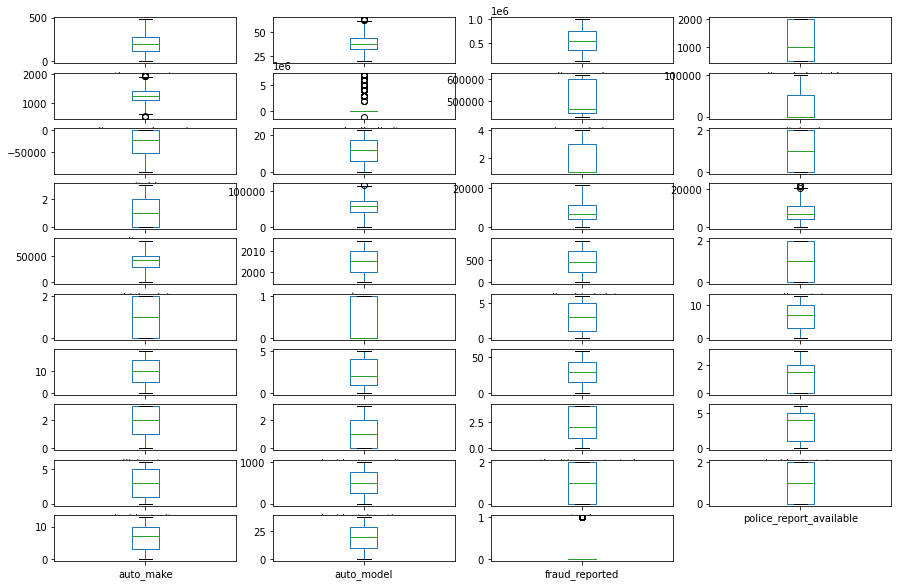

In [72]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(10,4),figsize = (15,10))

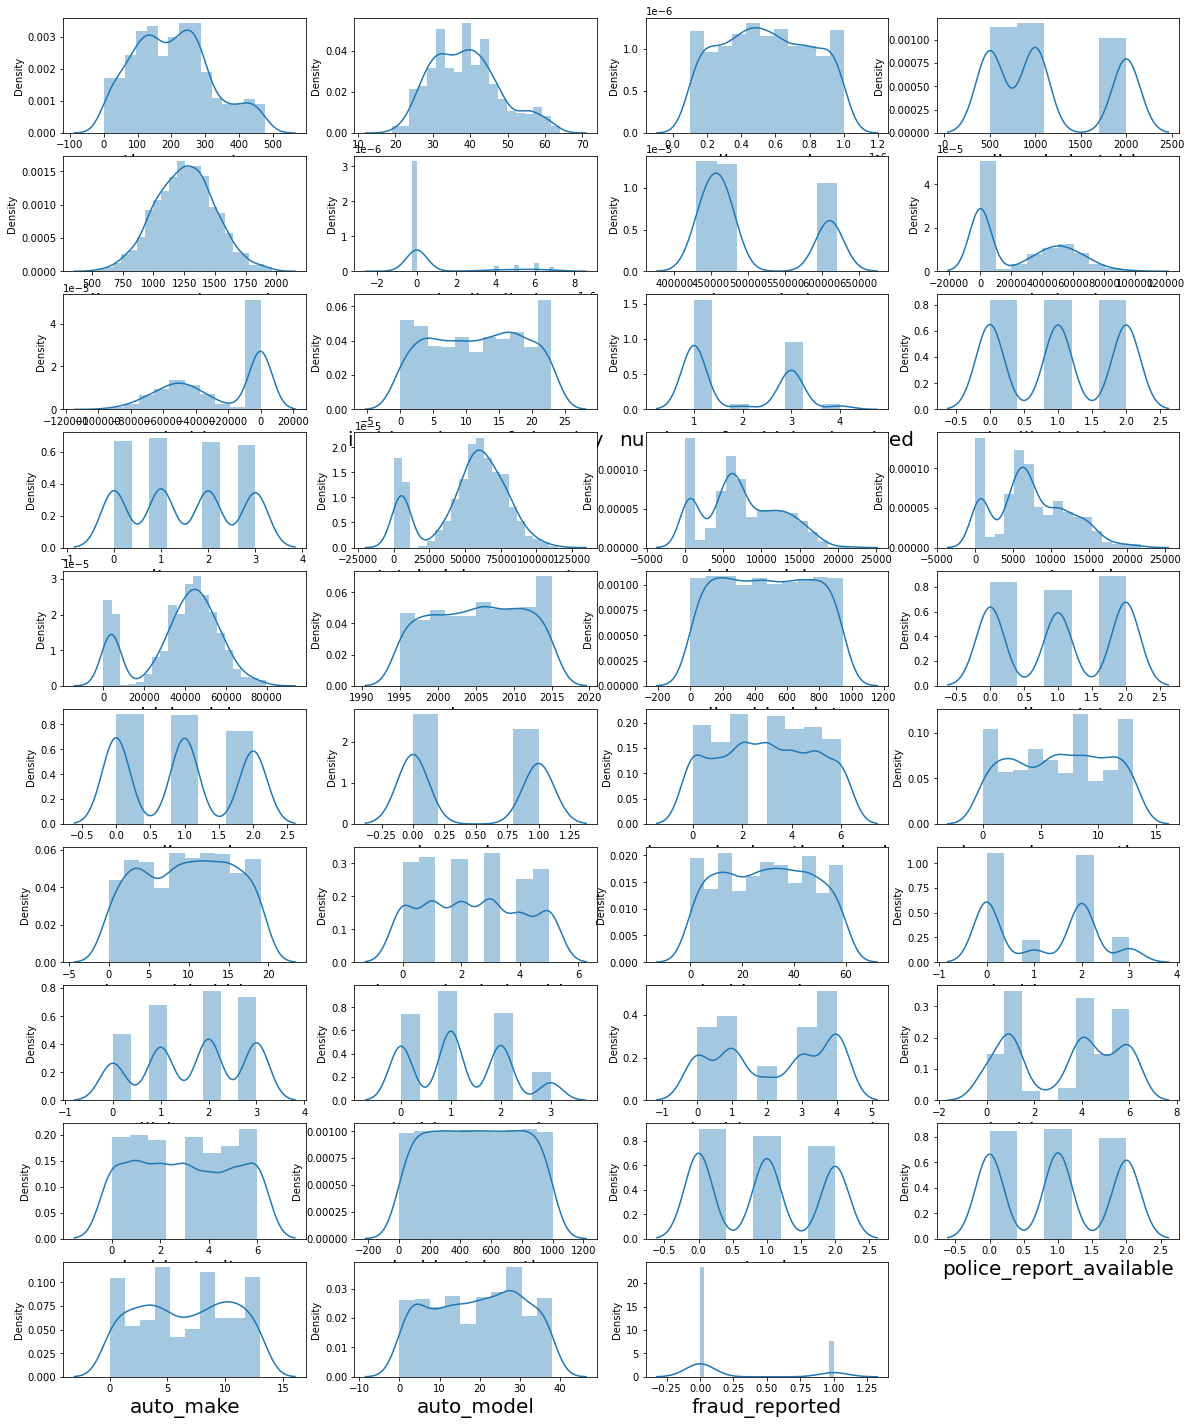

In [73]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=39:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

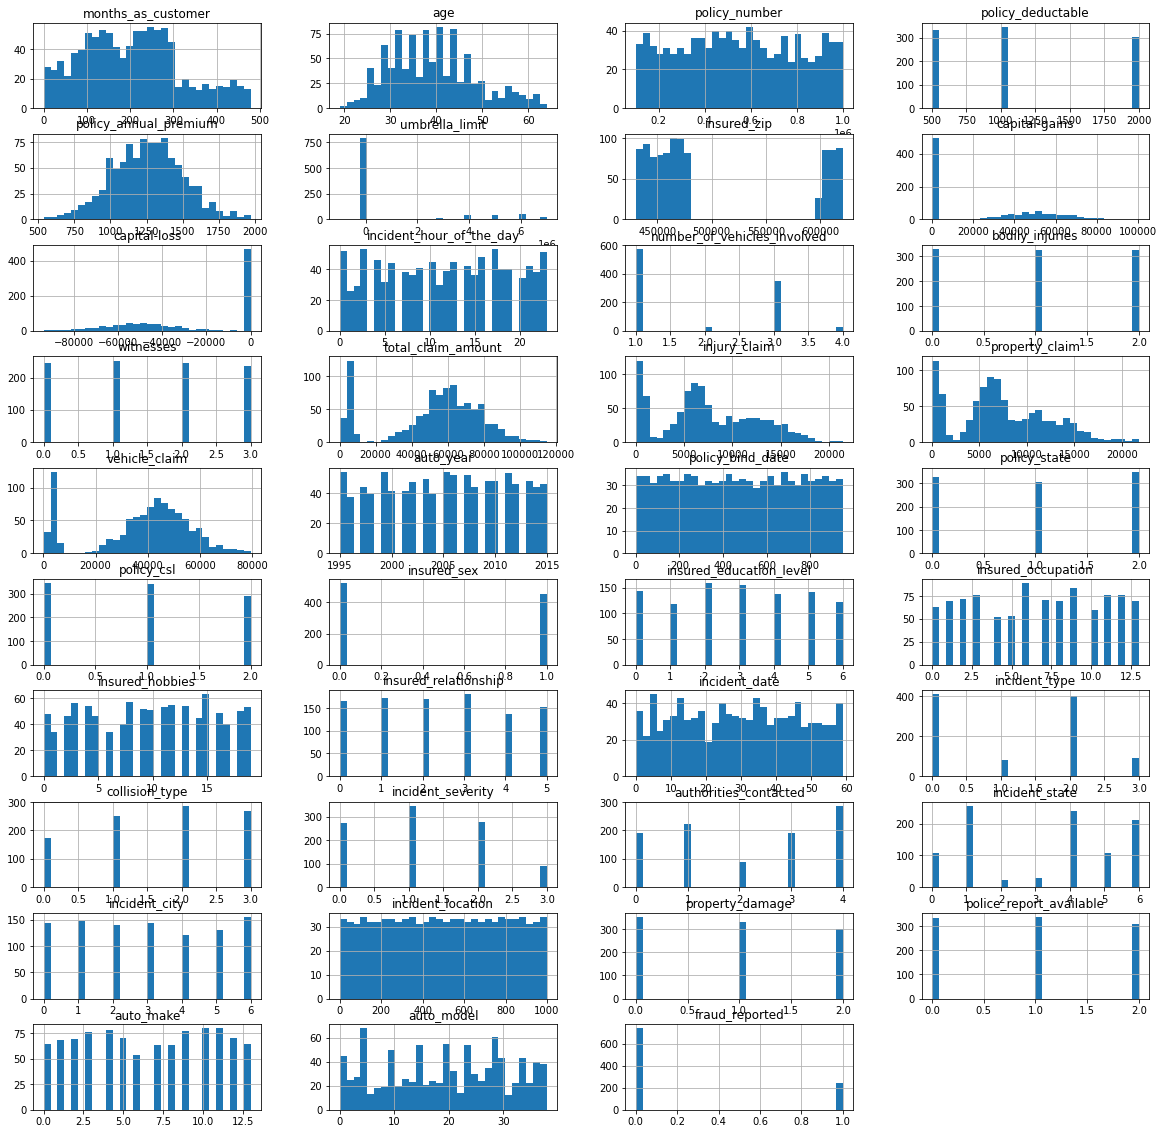

In [74]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (10,4), bins = 30)

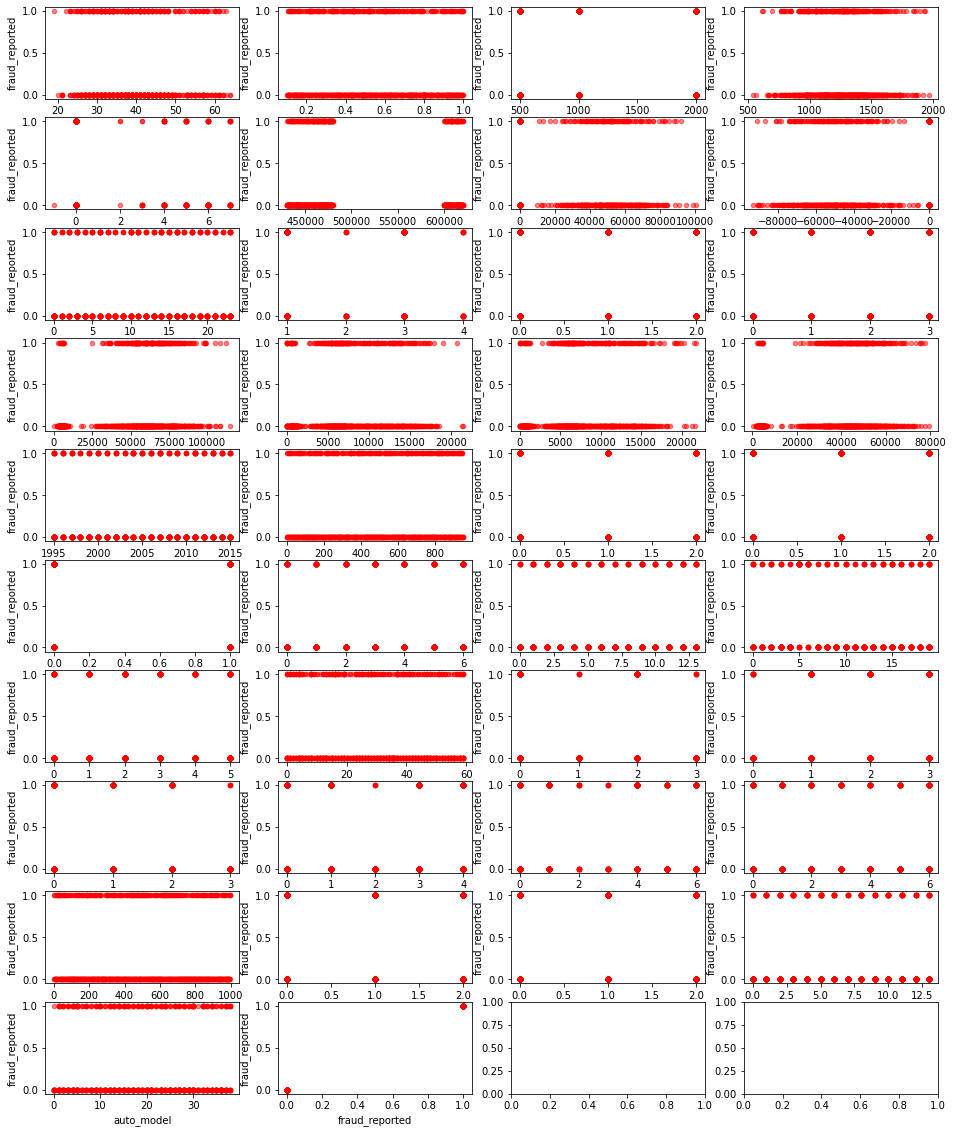

In [75]:
# setup figure
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='fraud_reported', ax=ax, alpha=0.5, color='r')


In [78]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['fraud_reported'])
y = data[["fraud_reported"]]
print(x.shape)
print(y.shape)

(980, 38)
(980, 1)


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=323)

In [86]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 1.06956809,  0.98335151, -0.09577376, ...,  1.26634503,
         0.85195935, -1.64044692],
       [ 0.20272605,  0.32971067, -0.79024501, ..., -1.20580264,
         0.35527871, -0.65173967],
       [-0.61210547, -1.08651116,  0.54971996, ...,  0.0302712 ,
        -0.63808258,  0.96614491],
       ...,
       [-0.64677915, -0.54181045,  1.44664899, ...,  1.26634503,
         1.10029967, -0.02256234],
       [ 2.19646275,  2.50851348, -0.04776382, ...,  1.26634503,
        -1.38310355, -1.28091701],
       [ 2.17912591,  2.2906332 ,  0.03826936, ..., -1.20580264,
         0.35527871, -0.65173967]])

In [89]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [100]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier


In [101]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test,predlr)*100))
#print('f1_Score:{}'.format(f1_score(y_test,predlr)*100))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))



Accuracy Score:81.12244897959184
[[144  15]
 [ 22  15]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       159
           1       0.50      0.41      0.45        37

    accuracy                           0.81       196
   macro avg       0.68      0.66      0.67       196
weighted avg       0.80      0.81      0.80       196



In [102]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test,preddt)*100))
#print('f1_Score:{}'.format(f1_score(y_test,predlr)*100))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,preddt))



Accuracy Score:78.06122448979592
[[144  15]
 [ 22  15]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       159
           1       0.44      0.59      0.51        37

    accuracy                           0.78       196
   macro avg       0.67      0.71      0.68       196
weighted avg       0.81      0.78      0.79       196



In [103]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test,predrfc)*100))
#print('f1_Score:{}'.format(f1_score(y_test,predlr)*100))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))


Accuracy Score:79.59183673469387
[[143  16]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       159
           1       0.45      0.35      0.39        37

    accuracy                           0.80       196
   macro avg       0.65      0.63      0.64       196
weighted avg       0.78      0.80      0.79       196



# conclusion from model

We got our best model i.e. LogisticRegression with the accuracy score of 81.12%. Here our model predicts 144 true positive cases out of 159 positive cases and 15 true negative cases out of 37 cases. It predicts 15 false positive cases out of 159 positive cases and 22 false negative cases out of 37 cases. 

# cross validation

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
for i in range(2,10):
    cv=cross_val_score(lr,x,y,cv=i)
    print(lr,cv.mean())

LogisticRegression() 0.7561224489795919
LogisticRegression() 0.7489853223516757
LogisticRegression() 0.7551020408163265
LogisticRegression() 0.7540816326530612
LogisticRegression() 0.7550937702628561
LogisticRegression() 0.7551020408163265
LogisticRegression() 0.7571221511395442
LogisticRegression() 0.7571450145354325


In [121]:
lr.fit(x_train,y_train)

LogisticRegression()

In [122]:
#lets plot and visualize
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

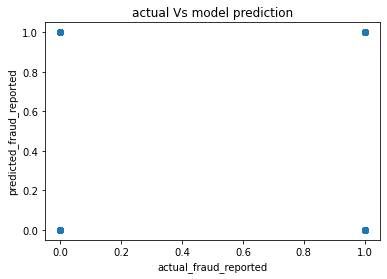

In [124]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_fraud_reported')
plt.ylabel('predicted_fraud_reported')
plt.title('actual Vs model prediction')
plt.show()

# saving model

In [125]:
import joblib

In [126]:
joblib.dump(lr,'fraud detection')

['fraud detection']

# conclusion

In [127]:
loaded_model=joblib.load('fraud detection')
result=loaded_model.score(x_test,y_test)
print(result)

0.8112244897959183


so in this way we have built the model